In [1]:
# Django Setup
import os
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "value_investing.settings")
from django.core.wsgi import get_wsgi_application
application = get_wsgi_application()
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from ancillary_info.models import Companies
from share_prices.models import SharePrices
from calculated_stats.models import CalculatedStats

In [4]:
data = Companies.objects.get_companies_joined()

In [5]:
pd.DataFrame(list(data))

,id,tidm,company_name,company_summary,industry__industry_name,comp_type__company_type,market__share_listing
0,1,AAL,Anglo American PLC,Anglo American's mining portfolio spans many c...,Industrial Metals and Mining,standard,FTSE 100
1,2,ABF,Associated British Foods PLC,Associated British Foods PLC is a diversified ...,Food Producers,standard,FTSE 100
2,4,AHT,Ashtead Group PLC,Ashtead Group PLC is a provider of equipment r...,Industrial Transportation,standard,FTSE 100
3,5,ANTO,Antofagasta PLC,Antofagasta is a Chilean copper mining company...,Industrial Metals and Mining,standard,FTSE 100
4,6,AUTO,Auto Trader Group PLC,Auto Trader Group PLC is a digital automotive ...,Software and Computer Services,standard,FTSE 100
...,...,...,...,...,...,...,...
95,62,NWG,NatWest Group PLC,NatWest Group is a universal bank headquartere...,Banks,bank,FTSE 100
96,80,SDR,Schroders PLC,"Schroders is an independent, U.K.-based, activ...",Investment Banking and Brokerage Services,bank,FTSE 100
97,84,SLA,Standard Life Aberdeen PLC,Standard Life Aberdeen PLC provides a variety ...,Investment Banking and Brokerage Services,bank,FTSE 100
98,87,SMT,Scottish Mortgage Investment Trust PLC,Scottish Mortgage Investment Trust PLC is an i...,Closed End Investments,bank,FTSE 100


In [6]:
company_tidm = 'AAL'
share_data = SharePrices.objects.get_share_joined_filtered(company_tidm)

In [7]:
share_df = pd.DataFrame(list(share_data))
share_df

,id,time_stamp,value,volume,adjustment,company__company_name,company__tidm
0,5438,2020-11-23,2189.00,2930123.0,1,Anglo American PLC,AAL
1,5439,2020-11-20,2144.00,2800524.0,1,Anglo American PLC,AAL
2,5440,2020-11-19,2120.00,2549472.0,1,Anglo American PLC,AAL
3,5441,2020-11-18,2171.50,7307821.0,1,Anglo American PLC,AAL
4,5442,2020-11-17,2140.50,3997555.0,1,Anglo American PLC,AAL
...,...,...,...,...,...,...,...
5432,10870,1999-05-28,718.50,NaN,0,Anglo American PLC,AAL
5433,10871,1999-05-27,716.50,NaN,0,Anglo American PLC,AAL
5434,10872,1999-05-26,742.75,NaN,0,Anglo American PLC,AAL
5435,10873,1999-05-25,770.00,NaN,0,Anglo American PLC,AAL


In [8]:
share_df_plot = share_df[['time_stamp','value']]
share_df_plot = share_df_plot.set_index('time_stamp')
share_df_plot

,value
time_stamp,
2020-11-23,2189.00
2020-11-20,2144.00
2020-11-19,2120.00
2020-11-18,2171.50
2020-11-17,2140.50
...,...
1999-05-28,718.50
1999-05-27,716.50
1999-05-26,742.75


Text(0, 0.5, 'Price (p)')

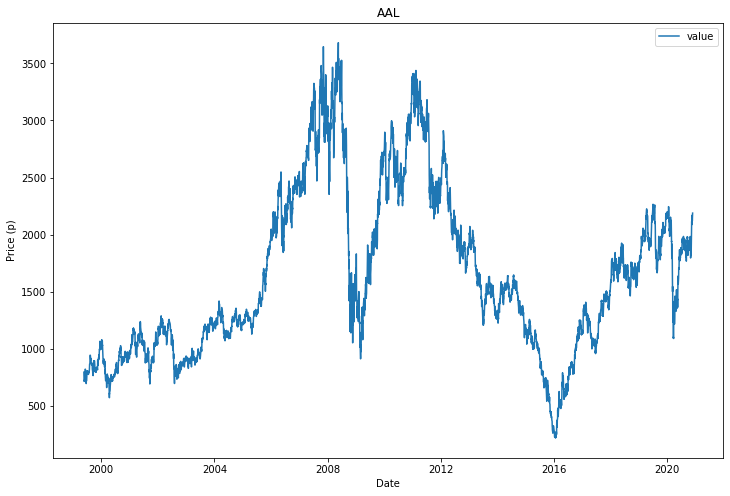

In [9]:
share_df_plot.plot(figsize=(12, 8))
plt.title(company_tidm)
plt.xlabel('Date')
plt.ylabel('Price (p)')

In [10]:
calc_data = CalculatedStats.objects.get_table_joined_filtered(company_tidm)
df_calc_data = pd.DataFrame(list(calc_data))
df_calc_data

,time_stamp,value,company__tidm,parameter__param_name
0,1998-12-31,0.4702579152322366,AAL,Debt to Equity (D/E)
1,1998-12-31,2.091137306265008,AAL,Current Ratio
2,1998-12-31,0.08337551281368213,AAL,Return on Equity (ROE)
3,1998-12-31,10.855407750144593,AAL,Equity (Book Value) Per Share
4,1998-12-31,nan,AAL,Price to Earnings (P/E)
...,...,...,...,...
633,2019-12-31,7.252540536119574,AAL,ROCE
634,2019-12-31,5.182993700031527,AAL,Median ROCE (10 year)
635,2019-12-31,8.612002567394095,AAL,Debt Ratio
636,2019-12-31,13.172091895496152,AAL,PE10


In [31]:
df_pivot = df_calc_data.pivot(
    columns="time_stamp",
    index="parameter__param_name",
    values="value",
)

In [12]:
df_pivot

time_stamp,1998-12-31,1999-12-31,2000-12-31,2001-12-31,2002-12-31,2003-12-31,2004-12-31,2005-12-31,2006-12-31,2007-12-31,...,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31
parameter__param_name,,,,,,,,,,,,,,,,,,,,,
Annual Yield (Return),nan,0.0629402675772458,0.0957619115193212,0.15244128416340125,0.07866604928329844,0.055005234480542585,0.10893341091325465,0.07595990801106284,0.09311497124966132,0.09031444363384566,...,0.09532119192275254,0.1261678037926013,-0.03435462385192456,-0.03155402765328001,-0.09621164264247019,-0.9092525827364881,0.07935836225051156,0.1077288472400863,0.11333625003592654,0.08960147929591981
Capital Employed,22386.7,22986.9,23191.0,19292.0,27334.0,34409.0,43869.0,42340.0,37684.0,32995.0,...,58774.0,64108.0,69580.0,62814.0,59283.0,46157.0,43624.0,47169.0,45360.0,48907.0
Current Ratio,2.091137306265008,1.9692520775623268,1.127946127946128,1.1441398108064775,1.1788058267968624,0.993024254131788,1.279482362763515,1.3766492146596858,1.4810773951585408,0.8975099855528172,...,1.8622177112408018,2.403096903096903,2.21282829339751,1.9349778469644354,2.1269510926118627,2.356045081967213,1.9078927203065135,1.9931006493506493,1.9473376243417202,1.94271911663216
DCF Intrinsic Value,-4.439360378914585,2.2332902686568645,2.2632016280907497,12.814729618186234,9.888025970974084,-13.286933143524317,13.544552854624616,34.964918753771315,54.02350751256449,35.96273174553568,...,29.673047599932932,22.60837543794334,-24.94946853268449,-17.480785723928882,-19.740143861781625,-15.883609766149782,29.188022428688804,62.3700128481584,33.8745402648988,23.482843948808032
DP10,nan,nan,nan,nan,nan,nan,nan,nan,nan,86.12975391498881,...,92.268326417704,67.45002701242572,48.638931689779156,31.37627763251723,27.496564360971142,7.18277764451907,32.63128334737433,43.13142239048135,41.3582584003786,42.466288841117844
Debt Ratio,nan,nan,nan,nan,4.122692344482352,5.490819571238076,4.787143101384852,3.1816468104358315,1.909185357208336,1.8772620340209916,...,2.4280913492809133,2.3062877390895618,4.669544034316581,7.022900763358779,11.928819667910929,-20.42168674698795,-7.337307778025407,-13.797833102812355,260.7848837209302,8.612002567394095
Debt to Equity (D/E),0.4702579152322366,0.39069281045751636,0.6831225948323254,0.7651248012168983,0.8088338270939941,0.8380411937788987,0.9287338072384801,0.8815722677496555,0.7135326427544513,0.8397862720920674,...,0.7554449448263149,0.674351651923568,0.809341990946088,0.9046408307461727,1.0514653323802716,1.43711929528629,1.0616238437821173,0.8891004778062461,0.7496647894877984,0.7891349370718496
Dividend Growth,None,yes,yes,yes,no,no,yes,yes,yes,yes,...,yes,yes,yes,no,yes,no,no,yes,yes,yes
Dividend Growth (10 year),nan,nan,nan,nan,nan,nan,nan,nan,nan,169.91735537190084,...,-31.48936170212765,-10.165975103734448,39.68410661401778,8.498583569405094,-0.30618493570115923,-12.141882673942694,-10.722610722610726,49.84472049689439,75.86605080831413,70.60070671378091


In [35]:
param_name = 'Annual Yield (Return)'
select_color = df_pivot.loc[df_pivot.index == param_name].astype("float")
select_color
# select_color.plot(figsize=(12, 8))

time_stamp,1998-12-31,1999-12-31,2000-12-31,2001-12-31,2002-12-31,2003-12-31,2004-12-31,2005-12-31,2006-12-31,2007-12-31,...,2010-12-31,2011-12-31,2012-12-31,2013-12-31,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31
parameter__param_name,,,,,,,,,,,,,,,,,,,,,
Annual Yield (Return),NaN,0.06294,0.095762,0.152441,0.078666,0.055005,0.108933,0.07596,0.093115,0.090314,...,0.095321,0.126168,-0.034355,-0.031554,-0.096212,-0.909253,0.079358,0.107729,0.113336,0.089601


In [33]:
df_unpivot = select_color.melt()
df_unpivot = df_unpivot.set_index('time_stamp')
df_unpivot

,value
time_stamp,
1998-12-31,NaN
1999-12-31,0.062940
2000-12-31,0.095762
2001-12-31,0.152441
2002-12-31,0.078666
2003-12-31,0.055005
2004-12-31,0.108933
2005-12-31,0.075960
2006-12-31,0.093115


Text(0, 0.5, 'Annual Yield (Return)')

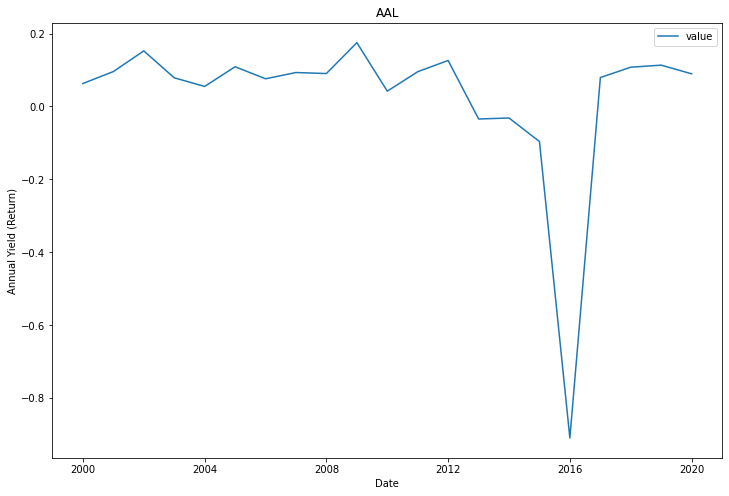

In [36]:
df_unpivot.plot(figsize=(12, 8))
plt.title(company_tidm)
plt.xlabel('Date')
plt.ylabel(param_name)